<a href="https://colab.research.google.com/github/overlord-17/car-price-prediction/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error

In [2]:
df = pd.read_csv("/content/drive/MyDrive/datasets/car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df.shape

(301, 9)

In [6]:
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.drop(['Car_Name'], axis=1, inplace=True)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
df['Current_Year'] = 2021
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [10]:
df['No_of_years'] = df["Current_Year"] - df["Year"]
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_of_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [11]:
df.drop(['Year'], axis=1, inplace=True)

In [12]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [13]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Current_Year,No_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,2021,7,0,1,0,1
1,4.75,9.54,43000,0,2021,8,1,0,0,1
2,7.25,9.85,6900,0,2021,4,0,1,0,1
3,2.85,4.15,5200,0,2021,10,0,1,0,1
4,4.60,6.87,42450,0,2021,7,1,0,0,1


In [14]:
df.drop(['Current_Year'], axis=1, inplace=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [15]:
df.shape

(301, 9)

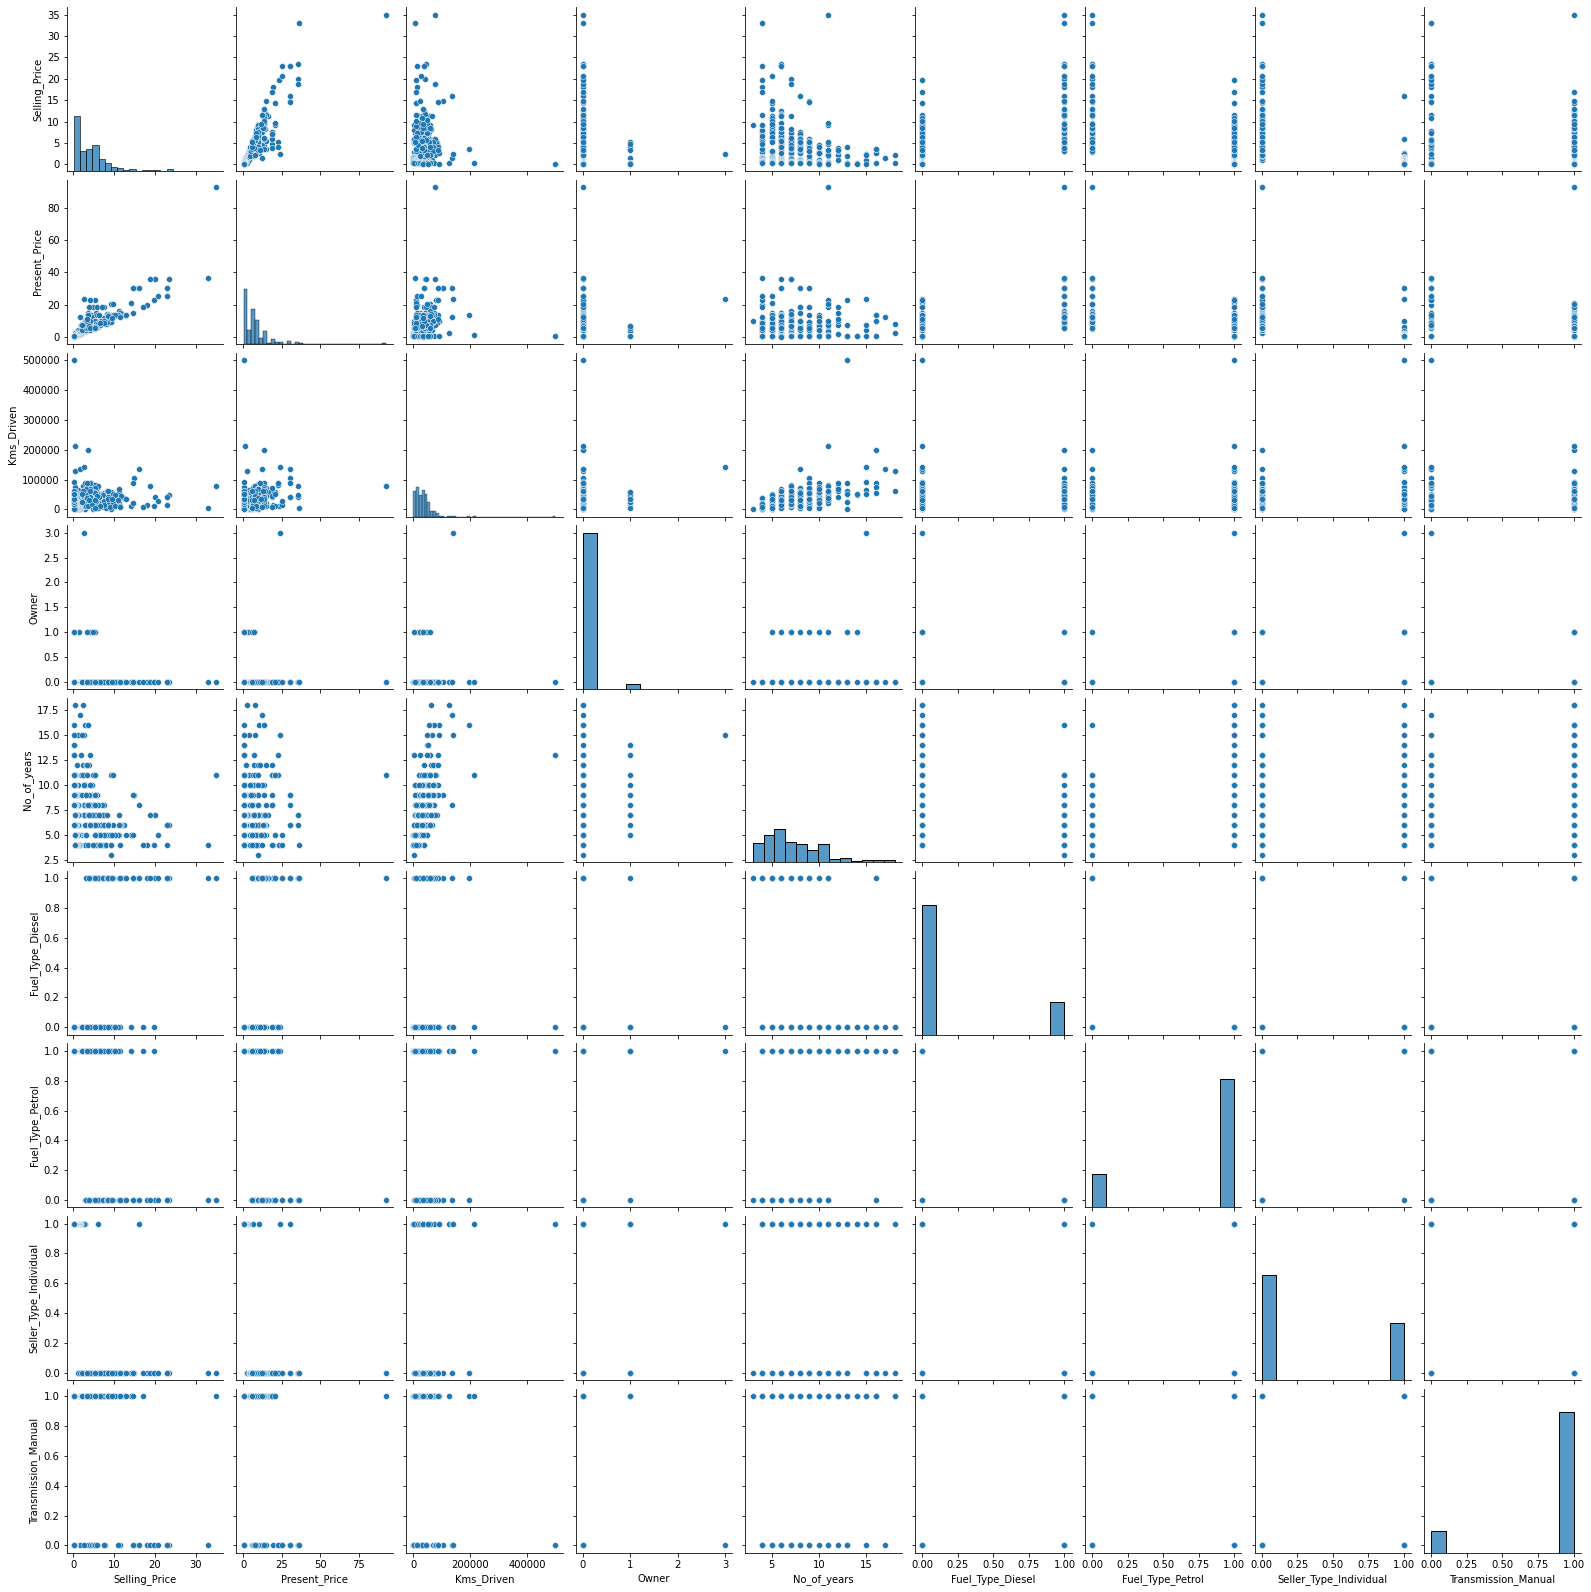

In [16]:
sns.pairplot(df);

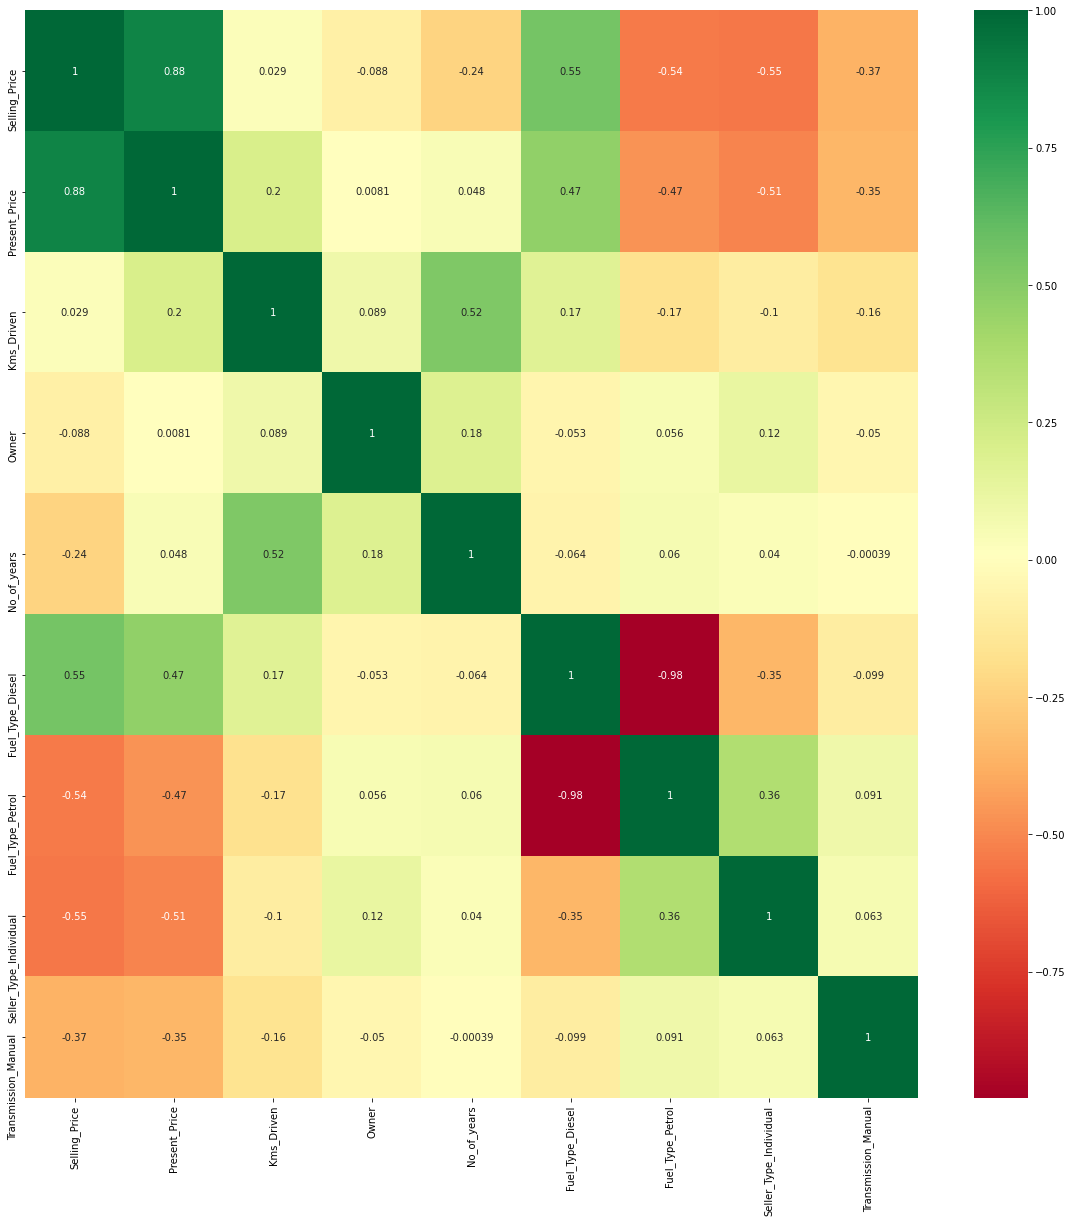

In [17]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn");

In [18]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]
X.shape, y.shape

((301, 8), (301,))

In [19]:
X.head()

,Present_Price,Kms_Driven,Owner,No_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [20]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [21]:
model = ExtraTreesRegressor()
model.fit(X, y)
print(model.feature_importances_)

[0.36941333 0.04498304 0.0009078  0.07748287 0.22896165 0.00808402
 0.12510125 0.14506603]


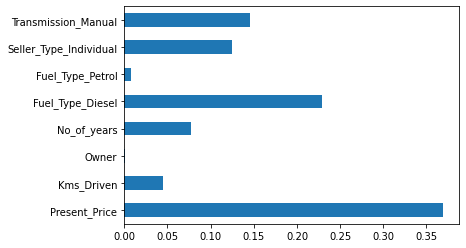

In [22]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.plot(kind='barh')
plt.show();

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((210, 8), (91, 8))

In [30]:
def rmsle(y_test, y_preds):
  return np.sqrt(mean_squared_log_error(y_test, y_preds))
  
def show_scores(model):
  train_preds = model.predict(X_train)
  test_preds = model.predict(X_test)
  scores = {
      "Training MAE": mean_absolute_error(y_train, train_preds),
      "Test MAE": mean_absolute_error(y_test, test_preds),
      "Training RMSLE": rmsle(y_train, train_preds), 
      "Test RMSLE": rmsle(y_test, test_preds),
      "Training R^2": r2_score(y_train, train_preds),
      "Test R^2": r2_score(y_test, test_preds)
  }
  return scores

In [28]:
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [31]:
show_scores(regressor)

{'Test MAE': 0.629523076923077,
 'Test RMSLE': 0.1382867023328636,
 'Test R^2': 0.9614685590651246,
 'Training MAE': 0.27588428571428525,
 'Training RMSLE': 0.06272487730470916,
 'Training R^2': 0.9826696943210723}

In [32]:
n_estimators = [int(x) for x in np.linspace(100, 1200, num=12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

random_grid = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf
}

In [48]:
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_grid,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=1
)

rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.3s
[CV] n_estimators=200, min_samples_spl

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  3.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [49]:
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [52]:
predictions = rf_random.predict(X_test)
predictions

array([ 0.4620124 , 10.85648266,  5.00206389,  0.21084468,  7.57894813,
        6.54273445,  1.03214366,  0.58710456,  0.46318784,  6.57703475,
        7.88581011,  0.99363628,  8.35574405,  0.47934962,  5.19758601,
        2.65346677,  1.14146933, 12.90782784,  0.46390855,  1.59468488,
        0.26828887,  7.84063495,  4.75008948,  2.83929179,  0.51718881,
        3.97412304,  5.38875655,  3.31596365,  1.1388956 ,  1.16202663,
        0.52085232,  9.98554782,  0.4636426 ,  2.72711355,  7.74627531,
        4.3206164 ,  5.99167276,  6.24805446,  2.7012122 ,  6.69081141,
        4.56940179,  3.76304613,  4.93592034,  0.54800623,  6.07717098,
        0.76740587,  8.40441567,  6.15340585,  3.00573396,  4.01217491,
        4.89797778,  1.53800506, 22.88060997, 19.29744575,  6.56521878,
       10.67987532,  5.05358391,  9.14960502,  2.77467654,  6.79165516,
        0.23428736,  0.21736339,  0.78034863,  0.45605813,  4.32860704,
        1.12044974, 22.82712188, 20.61583497,  6.2042677 ,  0.48

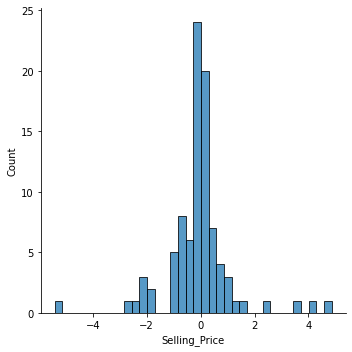

In [53]:
sns.displot(y_test-predictions);

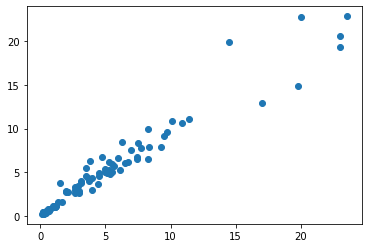

In [54]:
plt.scatter(y_test, predictions);

In [59]:
show_scores(rf_random)

{'Test MAE': 0.7058971997401254,
 'Test RMSLE': 0.1476979820834211,
 'Test R^2': 0.9444220877854413,
 'Training MAE': 0.4054228847534742,
 'Training RMSLE': 0.0857789240424304,
 'Training R^2': 0.9633441796038447}